In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from survival import *

First we load in the data which can be found in the textbook from Klein and Moeschberger. 

In [35]:
kidney = pd.read_csv("kidney.txt", delim_whitespace = True)

Patients in this dataset with renal insufficiency were given two different types of catheters. Type 1 is a surgically placed catheter and type 2 received a percutaneously placed cathether. More information can be found in Klein and Moeschberger.

In [36]:
cut = df[df["type"]==1]
percut = df[df["type"]==2]
percut.head(n=3)

,time,delta,type
43,0.5,1,2
44,0.5,1,2
45,0.5,1,2


First we create two different Kaplan Meier estimates for both types.

In [37]:
kmf_cut = KaplanMeierFitter(cut["time"], cut["delta"])
kmf_percut = KaplanMeierFitter(percut["time"], percut["delta"])


The KaplanMeierFitter class gives you the option to directly retrieve the values of certain estimators or characteristics such as the survival time, number of individuals at risk or the variance.

In [38]:
kmf_cut.survival_times_


[0.9767441860465116,
 0.9523255813953487,
 0.8994186046511626,
 0.8721634954193093,
 0.8023904157857645,
 0.765918124159139,
 0.727622217951182,
 0.6871987613983386,
 0.6247261467257623,
 0.5622535320531861,
 0.4997809173806098,
 0.37483568803545736,
 0.18741784401772868]

In [39]:
kmf_cut.risk

array([43., 40., 36., 33., 25., 22., 20., 18., 11., 10.,  9.,  4.,  2.])

In [40]:
kmf_cut.survival_variance_

[0.0005282553737406769,
 0.001083534311444275,
 0.0022883058296404362,
 0.002872052565316366,
 0.004670315306396302,
 0.005525153744261722,
 0.0063796988648704075,
 0.007233808823733063,
 0.009526379476168651,
 0.011228912201321975,
 0.012341406999193033,
 0.018650524189130636,
 0.022225355175409498]

In [41]:
kmf_cut.df


,time_under_study,indicator,number_at_risk
0,1.5,1,43.0
2,3.5,1,40.0
3,4.5,2,36.0
4,5.5,1,33.0
7,8.5,2,25.0
8,9.5,1,22.0
9,10.5,1,20.0
10,11.5,1,18.0
14,15.5,1,11.0
15,16.5,1,10.0


We can also make a plot of the cumulative hazard function using chfplot()

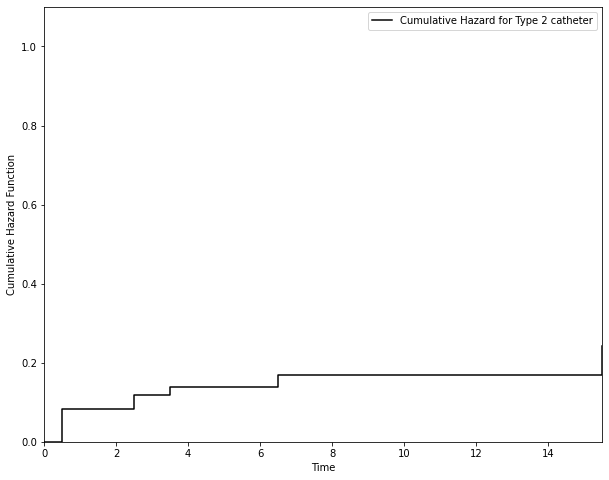

In [42]:
kmf_percut.chfplot(label = "Cumulative Hazard for Type 2 catheter")

It also allows you to put multiple cumulative hazard functions in the some figure

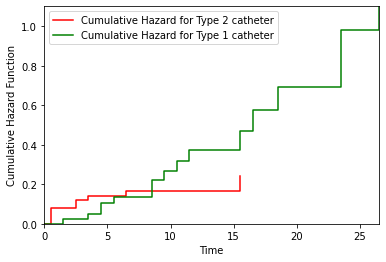

In [43]:
fig, ax = plt.subplots(1, 1)
kmf_percut.chfplot(ax = ax, label = "Cumulative Hazard for Type 2 catheter", color = "red")
kmf_cut.chfplot(ax = ax, label = "Cumulative Hazard for Type 1 catheter", color = "green")

We are also given the option to display the confidence bands for the survival function. For instance, here I chose to plot the log-transformed confidence bands using the method by Nair.

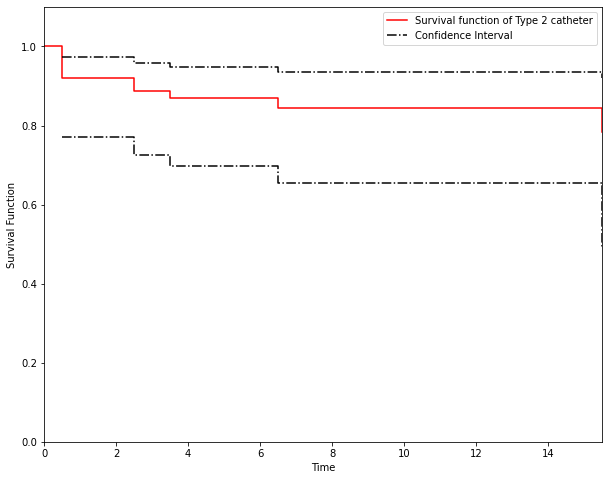

In [44]:
kmf_percut.survplot(label = "Survival function of Type 2 catheter", color = "red", conf_int = "logb")

Similar to before, the survplot() function also gives you the option to graphically compare multiple survival curves.

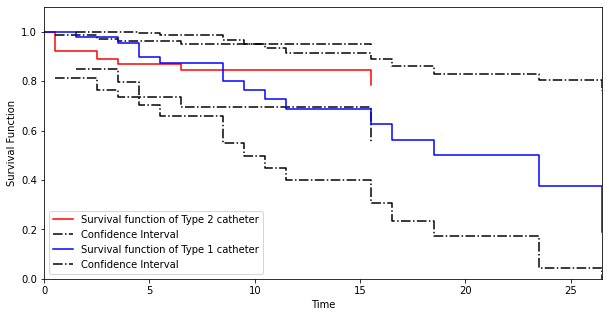

In [47]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
kmf_percut.survplot(label = "Survival function of Type 2 catheter", color = "red", conf_int = "arcsinb", ax = ax)
kmf_cut.survplot(label = "Survival function of Type 1 catheter", color = "blue", conf_int = "arcsinb", ax = ax)

We can also conduct a hypothesis test comparing the hazard rates of different KaplanMeierFitter objects. You are given the option to perform a log-rank test or using the method by Fleming by specifiying the parameters p and q (see Klein for reference)

In [49]:
kmf_percut.two_sample_comparison(kmf_cut, method = "fleming")

(1.386522781927405, 0.2389931972990773)